In [6]:
pip install requests

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python3.9 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install openpyxl

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python3.9 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
import requests

salary_info_link = 'https://rosstat.gov.ru/storage/mediabank/tab2-zpl_07.xlsx.xlsx'
resp = requests.get(salary_info_link)

xlsx = resp.content

In [9]:
import io
import pandas as pd

toread = io.BytesIO()
toread.write(xlsx)  
toread.seek(0) 

df = pd.read_excel(toread)
df = df.drop(index=[0])

In [10]:
df

,"Среднемесячная номинальная начисленная заработная плата работников по полному кругу организаций по субъектам Российской Федерации в 2013-2018 гг., рублей",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72
1,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,январь,февраль,март,апрель,май,июнь,июль,август,сентябрь,...,март,апрель,май,июнь,июль,август,сентябрь,октябрь,ноябрь,декабрь
3,Российская Федерация,26840.1,26619.6,28692.9,30025.9,29723,30986.1,30228.7,29226.3,29345.5,...,42363.573197,43381.051689,44075.537537,45848.077648,42413.465177,41363.600671,41774.303366,42331.668715,42595.00533,55569.330224
4,Центральный федеральный округ,32118.1,32249.7,35164.6,37138,35546.7,37723,37394,35277.9,35156.4,...,53771.108479,56192.142999,53566.574932,58177.204035,52984.806847,51383.060017,51529.217602,52715.114811,52642.495123,71661.794213
5,Белгородская область,20381.2,19643.7,21027.2,21700.9,21905.5,22323,23128.5,22271.2,21870.4,...,30092.12004,31477.559109,31179.394927,31947.007286,32422.184653,31603.08676,30909.67647,31823.450615,31162.800891,37577.386047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Сахалинская область,44705.6,43528.2,49032.3,45810.4,47698.1,48177.8,49516.9,48364.9,49119,...,71123.624171,70909.658249,78170.839596,75922.647905,74849.744258,73389.077156,73315.690888,73042.597875,73260.912303,92818.553933
98,Еврейская авт.область,25716.7,23360.2,25514.5,26199.7,27908.9,27982.4,27093.3,25652.8,25894.6,...,37680.249081,37004.568845,39900.765247,40315.840182,38416.14682,36888.718792,38348.73911,38439.861784,39796.725242,50289.200218
99,Чукотский авт.округ,65699.1,60540.7,68876.3,74151.1,69869.5,68135.7,69493.7,67369.7,66379,...,99784.422244,101383.033832,105183.249881,99984.071654,97954.630398,91654.168847,91481.505899,94265.115994,96929.965652,120154.774412
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
YEAR = 2018

index = None

for i in range(len(df.columns)):
    if df.iloc[0][i] == YEAR:
        index = i + 1
        break
        
df_year = df.iloc[:, [0, index]]

In [12]:
df_not_null = df_year.dropna()
df_not_null

,"Среднемесячная номинальная начисленная заработная плата работников по полному кругу организаций по субъектам Российской Федерации в 2013-2018 гг., рублей",Unnamed: 62
3,Российская Федерация,40443.362879
4,Центральный федеральный округ,51279.216096
5,Белгородская область,29455.536831
6,Брянская область,25261.278618
7,Владимирская область,28164.645055
...,...,...
95,Амурская область,38308.014495
96,Магаданская область,79059.633888
97,Сахалинская область,69341.007613
98,Еврейская авт.область,35791.558234


In [13]:
df_not_null = df_not_null.rename(columns={df_not_null.columns[0]: 'region', df_not_null.columns[1]: 'salary'})

<AxesSubplot: xlabel='region'>

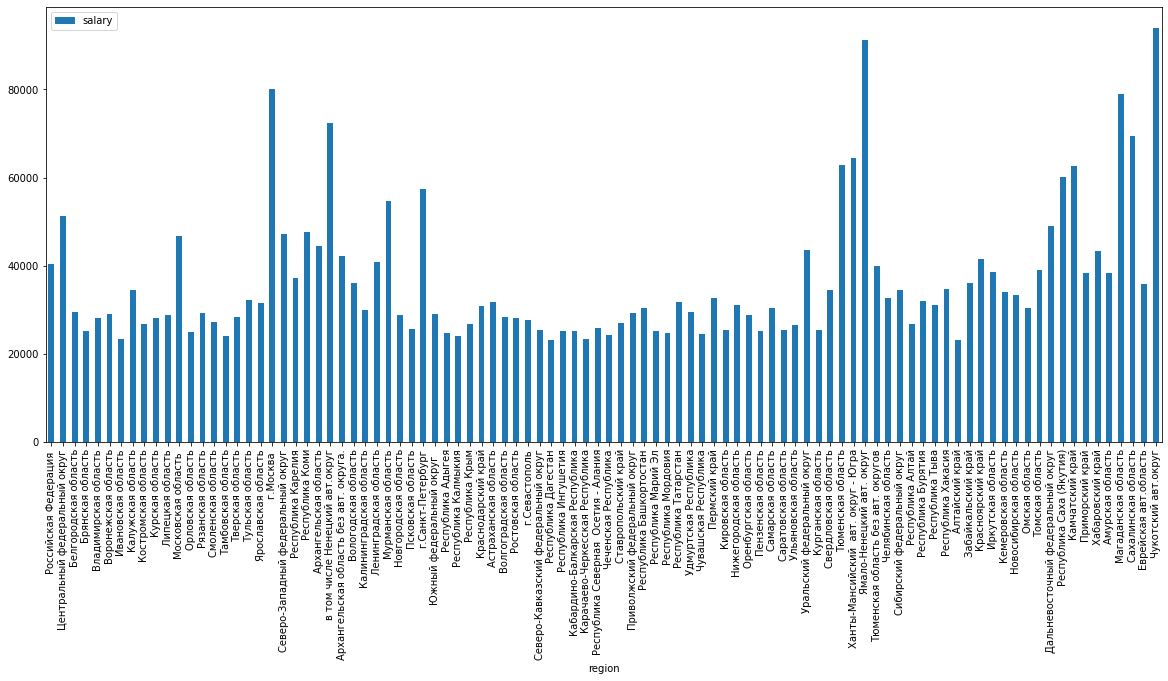

In [14]:
df_not_null.plot(x="region", y=["salary"], kind="bar", figsize=(20, 8))